In [1]:
import matplotlib.pyplot as plt
import networkx as nx 
import numpy as np

from tqdm import tqdm

In [2]:
import severability

In [3]:
G = nx.karate_club_graph()
A = nx.to_numpy_array(G)
P = severability.transition_matrix(A)

In [4]:
np.sum(P,axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [5]:
np.sum(P,axis=1)

array([4.88603636, 2.46068441, 2.14403578, 1.42302576, 0.60027473,
       1.33104396, 1.17857143, 0.47342887, 0.63414217, 0.0719697 ,
       0.63690476, 0.07142857, 0.19047619, 0.56391812, 0.12061404,
       0.1622807 , 0.44505495, 0.08210181, 0.06798246, 0.1374179 ,
       0.0997807 , 0.11658456, 0.11513158, 1.11051668, 0.46886447,
       0.85714286, 0.34935897, 0.76298701, 0.19751082, 0.95645363,
       0.38688347, 1.35526316, 3.86213909, 5.67999034])

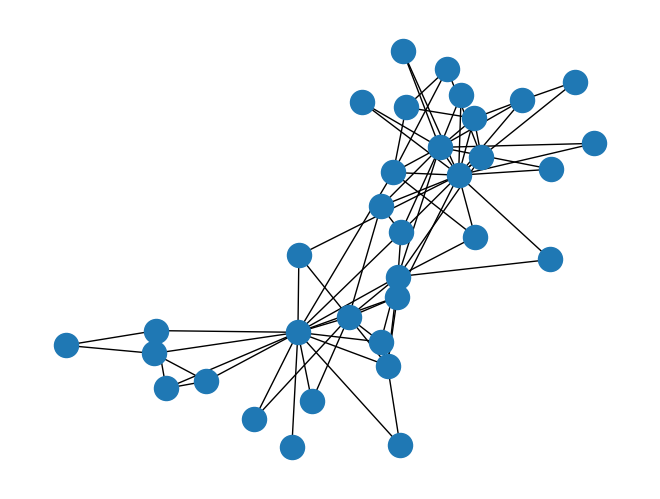

In [6]:
nx.draw(G)

In [7]:
times = np.arange(1,20,1)
n_communities = np.zeros_like(times)
s_communities = np.zeros_like(times)

for i in tqdm(range(len(times))):
    t = times[i]
    partition = severability.component_cover(P,t=t)
    n_communities[i] = len(partition)
    sizes = np.zeros(len(partition))
    for j in range((len(partition))):
        sizes[j] = len(partition[j][0])
    s_communities[i] = sizes.mean()
    

100%|██████████| 19/19 [00:15<00:00,  1.25it/s]


[Text(0.5, 0, 'time'), Text(0, 0.5, 'number communities')]

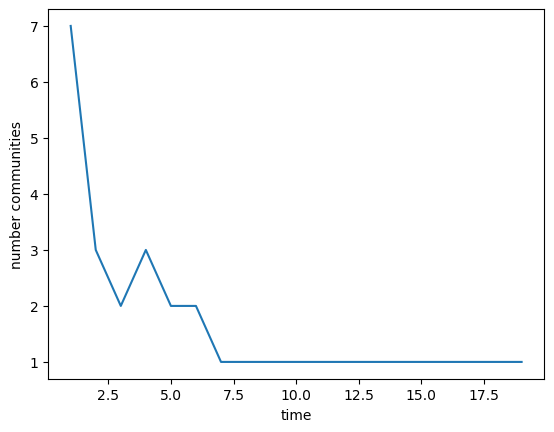

In [8]:
fig, ax = plt.subplots(1)
ax.plot(times,n_communities)
ax.set(xlabel="time", ylabel="number communities")

[Text(0.5, 0, 'time'), Text(0, 0.5, 'mean community size')]

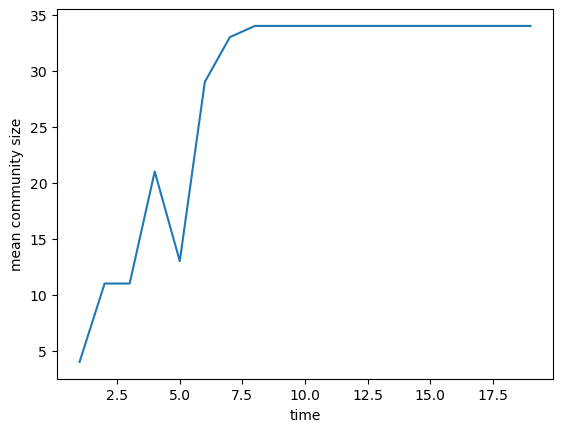

In [9]:
fig, ax = plt.subplots(1)
ax.plot(times,s_communities)
ax.set(xlabel="time", ylabel="mean community size")